## Contents

>### [1. K-Nearest Neighbors (KNN)](#1)
>### [2. Load and Read Data](#2)
>### [3. Data Visualization](#3)
>### [4. Datayı Kullanabilir Hale Getirme](#4)
>### [5. Normalization](#5)
>### [6. Train Test Split](#6)
>### [7. KNN Modeli Oluşturma](#7)
>### [8. En Uygun K Değerini Bulma](#8)

<a id="1"></a>
## 1. K-Nearest Neighbor (KNN) Intro

* Supervised learning algoritmalarından biri olan KNN algoritması, hem classification hem de regression problemlerin çözümlerinde kullanılır.

* Sınıfları belli olan veri kümesindeki verilerden faydanarak, kümeye katılacak yeni değerin classını bulmaktır.

* Mevcut verilere göre uzaklığı *euclidean distance* ile hesaplanır. 
> Manhattan Distance ve Minkowski Distance fonksiyonları da uzaklığı hesaplamada kullanılır.

* Euclidean Distance Formul:

![euclidean.png](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/440px-Euclidean_distance_2d.svg.png)

* Avantajı : Basit ve gürültülü eğitim verilerine karşı dirençli olması

* Dezavantajı : Uzaklık hesabı yaparken bütün durumları sakladığından, büyük veriler için kullanıldığında çok sayıda bellek alanına gereksinim duymaktadır.

### KNN Algoritmasının Adımları

#### 1. K değerini belirle
#### 2. K'a en yakın data noktalarını bul
#### 3. K'a en yakın dataların hangi classtan olduğunu hesapla
#### 4. Test edilen nokta hangi classtan tespit et

<a id="2"></a>
## 2. Load and Read Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv
/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv


In [2]:
data = pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


<a id="3"></a>
## 3.Data Visualization

In [3]:
Abnormal = data[data["class"]=="Abnormal"]
Normal = data[data["class"]=="Normal"]

In [4]:
Abnormal.shape

(210, 7)

In [5]:
Normal.shape

(100, 7)

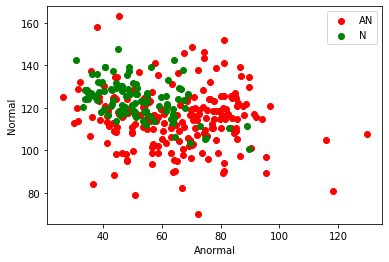

In [6]:
#Veri görselleştirme

plt.scatter(Abnormal.pelvic_incidence, Abnormal.pelvic_radius,color="red", label="AN")
plt.scatter(Normal.pelvic_incidence, Normal.pelvic_radius, color="green", label="N")
plt.legend()
plt.xlabel("Anormal")
plt.ylabel("Normal")
plt.show()

<a id="4"></a>
## 4. Datayı Kullanabilir Hale Getirme

In [7]:
data["class"] = [1 if each=="Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [8]:
y = data["class"].values
y[205:220]

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
x_data = data.drop(["class"], axis=1)
x_data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317


<a id="5"></a>
## 5. Normalization

In [10]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


<a id="6"></a>
## 6. Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

<a id="7"></a>
## 7. KNN Modeli Oluşturma

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)

In [15]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
prediction = knn.predict(x_test)

In [17]:
print("{} nn score: {}".format(3, knn.score(x_test,y_test)))

3 nn score: 0.7741935483870968


<a id="8"></a>
## 8. En Uygun K Değerini Bulma

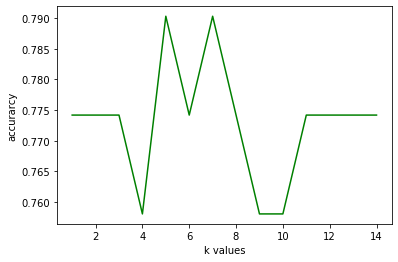

In [18]:
score_list=[]

for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15), score_list, color="green")
plt.xlabel("k values")
plt.ylabel("accurarcy")
plt.show()